In [1241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',35)

In [1242]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the Data

In [1243]:
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe

In [1244]:
df.shape

(730, 16)

In [1245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [1246]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1247]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1248]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [1249]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [1250]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1251]:
df.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


In [1252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


### Identified Column's Pre-Processing for Creating Dummy Variable

In [1253]:
df["season"].replace({1: "spring", 2: 'summer',3:'fall',4:'winter'}, inplace=True)
df["weathersit"].replace({1: "Clear, Few clouds, Partly cloudy, Partly cloudy", 
                          2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                          3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                          4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}, inplace=True)
df['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',
                    11:'Nov',12:'Dec'},inplace=True)
df['weekday'].replace({5:'Sun',6:'Mon',0:'Tue',1:'Wed',2:'Thu',3:'Fri',4:'Sat'},inplace=True)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Visualising the Data to Find the Correlation between the Numerical Variable

<Figure size 1440x1080 with 0 Axes>

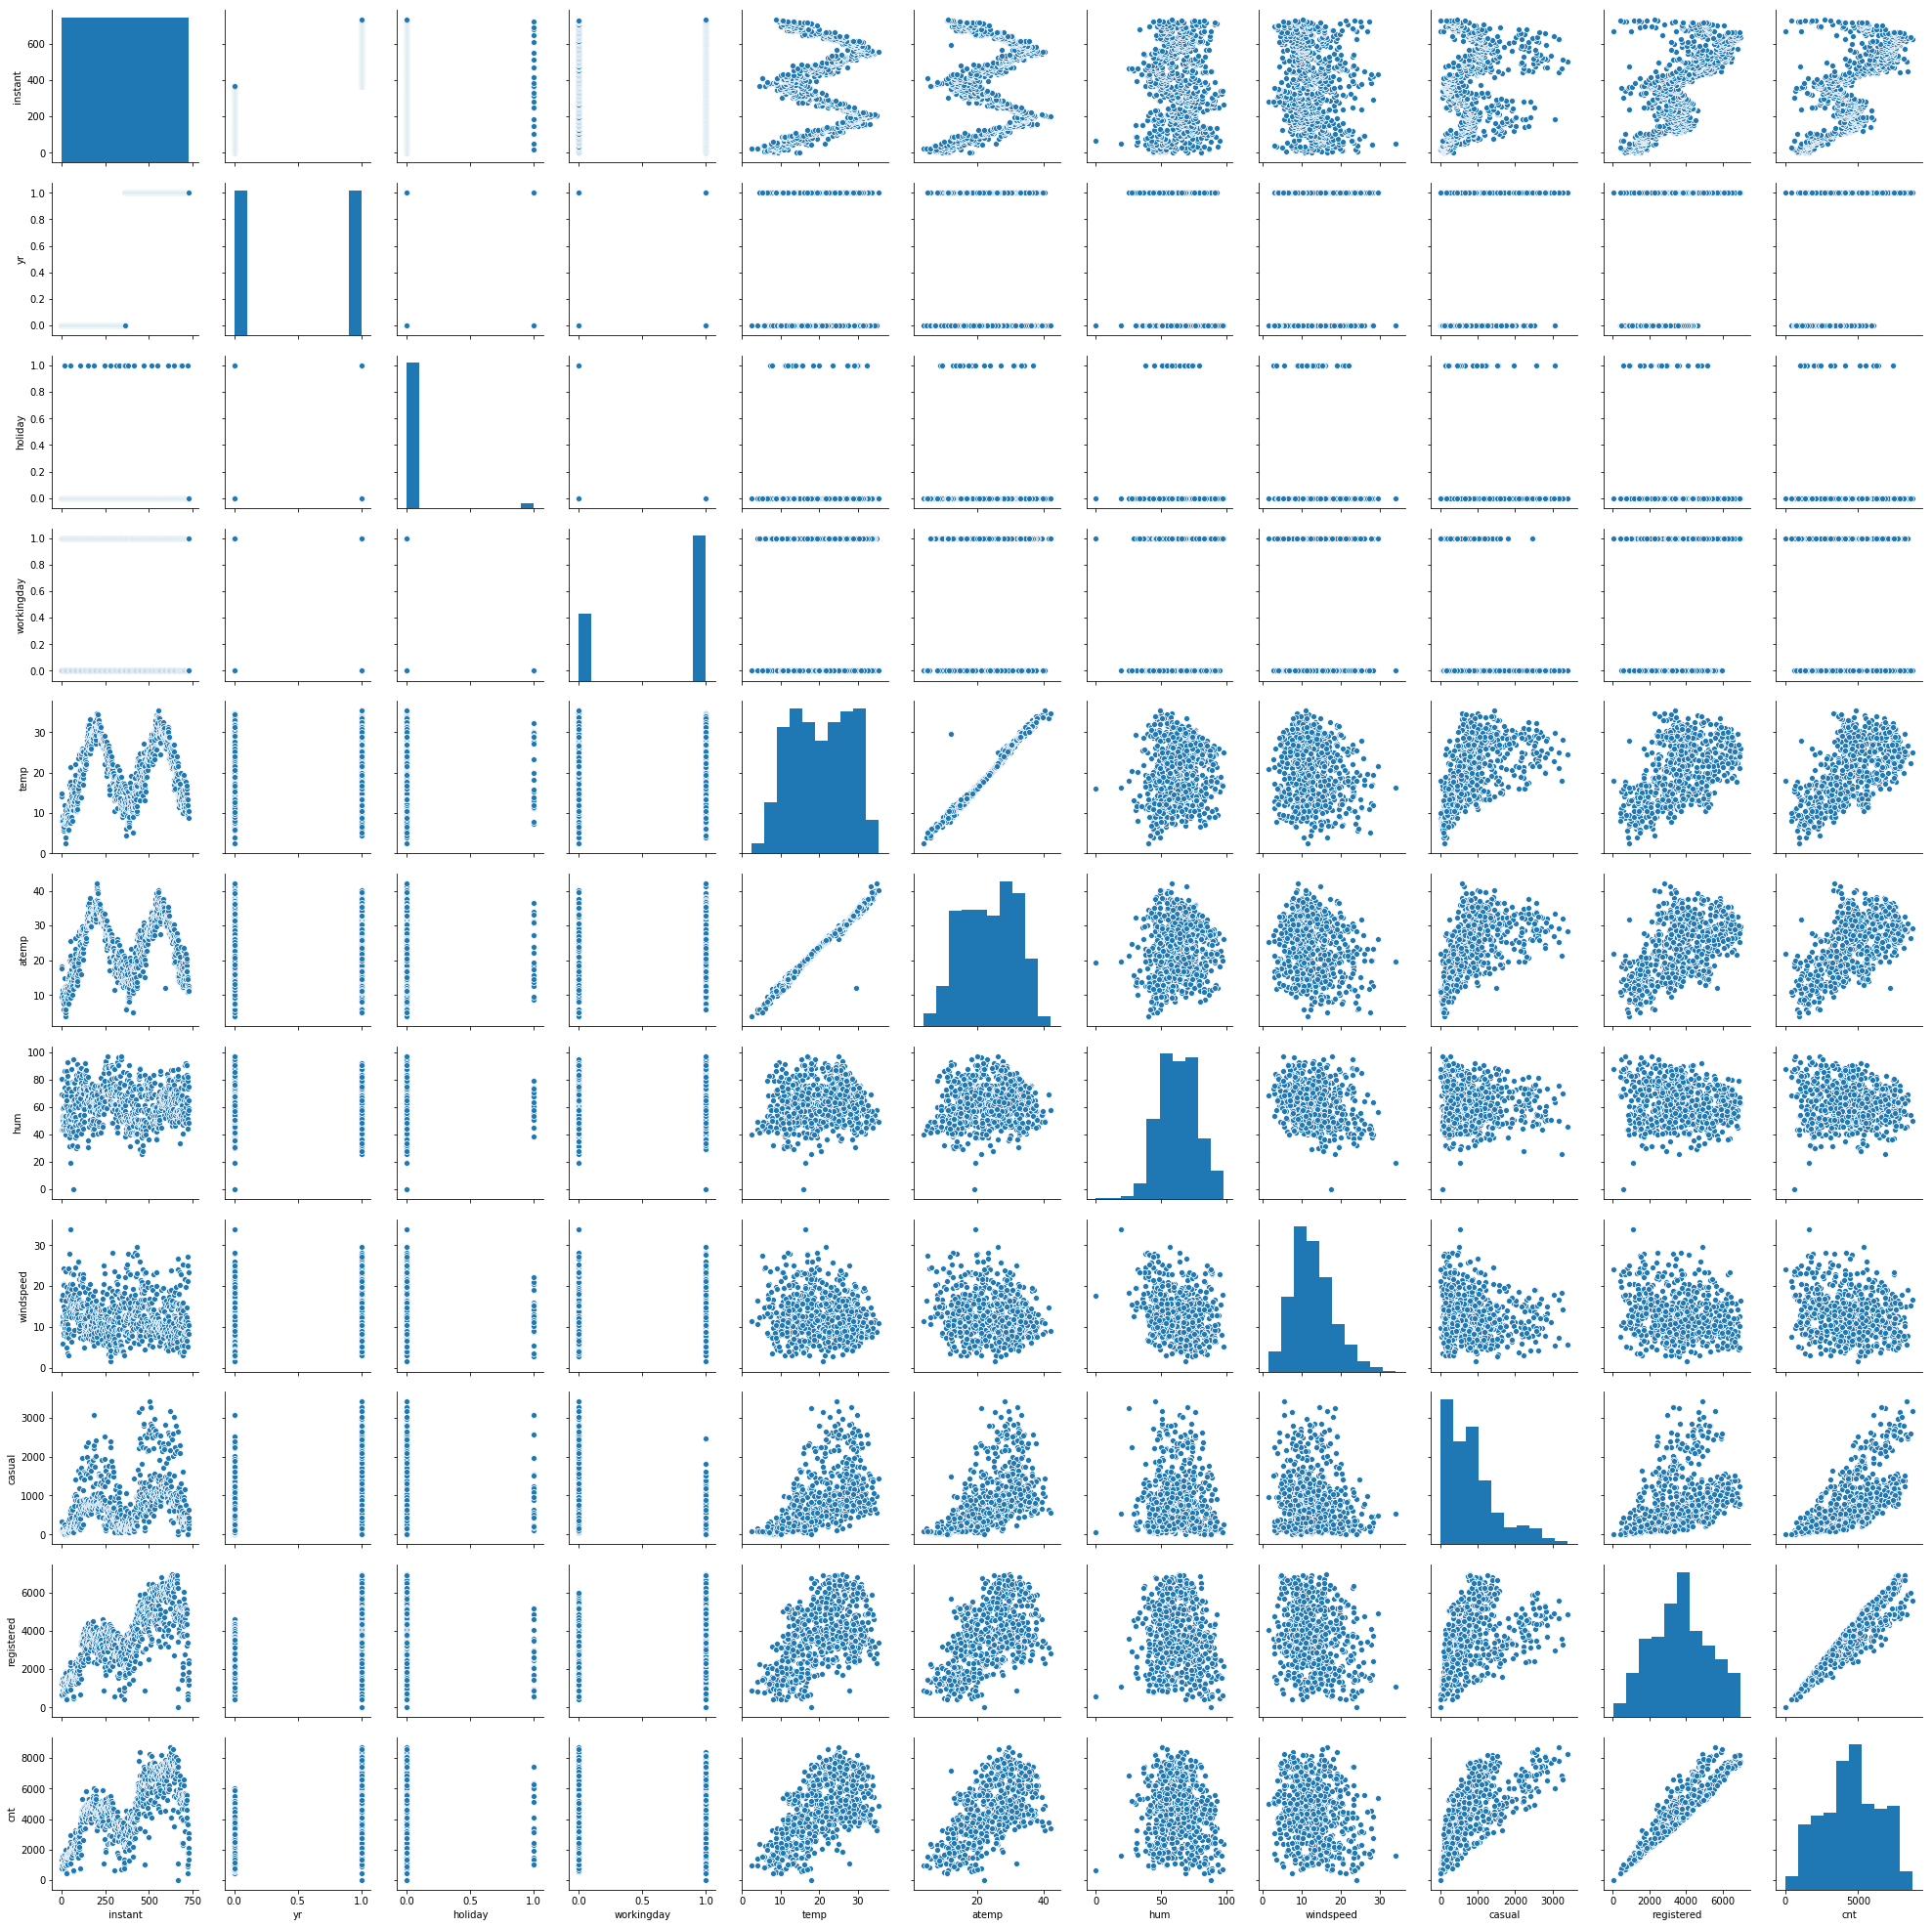

In [1254]:
plt.figure(figsize=(20,15))
sns.pairplot(df)
plt.show()

## Visualising Categorical Variables

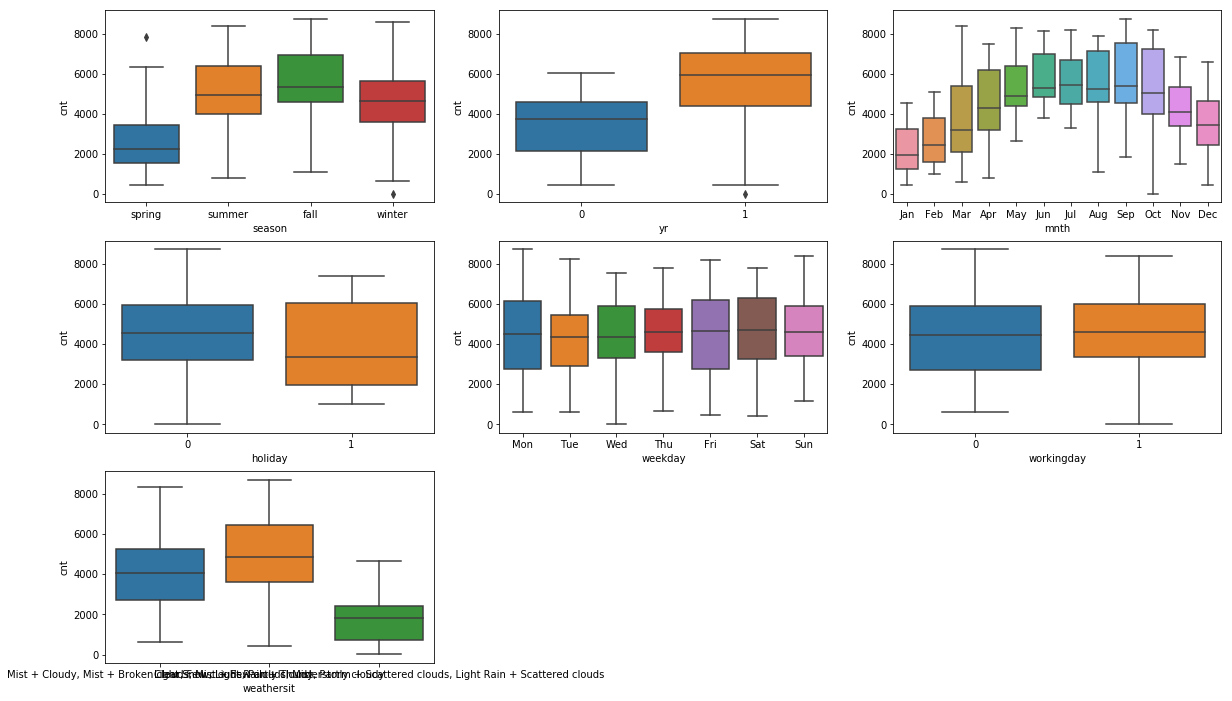

In [1255]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,7)

sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

#### Creating Dummy Variable of Column 'season','weathersit','mnth','weekday'

In [1256]:
status = pd.get_dummies(df['season'],drop_first=True)

In [1257]:
status1 = pd.get_dummies(df['weathersit'], drop_first = True)

In [1258]:
status2=pd.get_dummies(df['mnth'],drop_first=True)

In [1259]:
status3=pd.get_dummies(df['weekday'],drop_first=True)

In [1260]:
df=pd.concat([df,status1],axis=1)

In [1261]:
df=pd.concat([df,status],axis=1)

In [1262]:
df=pd.concat([df,status2],axis=1)

In [1263]:
df=pd.concat([df,status3],axis=1)

In [1264]:
df.drop(['season','weathersit','dteday','instant','weekday','mnth','casual','registered'],axis=1,inplace=True)

In [1265]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1266]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed'],
      dtype='object')

In [1267]:
df.shape

(730, 30)

## Step 4: Splitting the Data into Training and Testing Sets

In [1268]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1269]:
print(df_test.shape)
print(df_train.shape)

(219, 30)
(510, 30)


In [1270]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Rescaling the Features 

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.So Min-Max scaling is used to scale('temp', 'atemp', 'hum', 'windspeed', 'cnt') these columns


In [1271]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [1272]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [1273]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [1274]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.029412,0.343137,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.169124,0.475223,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


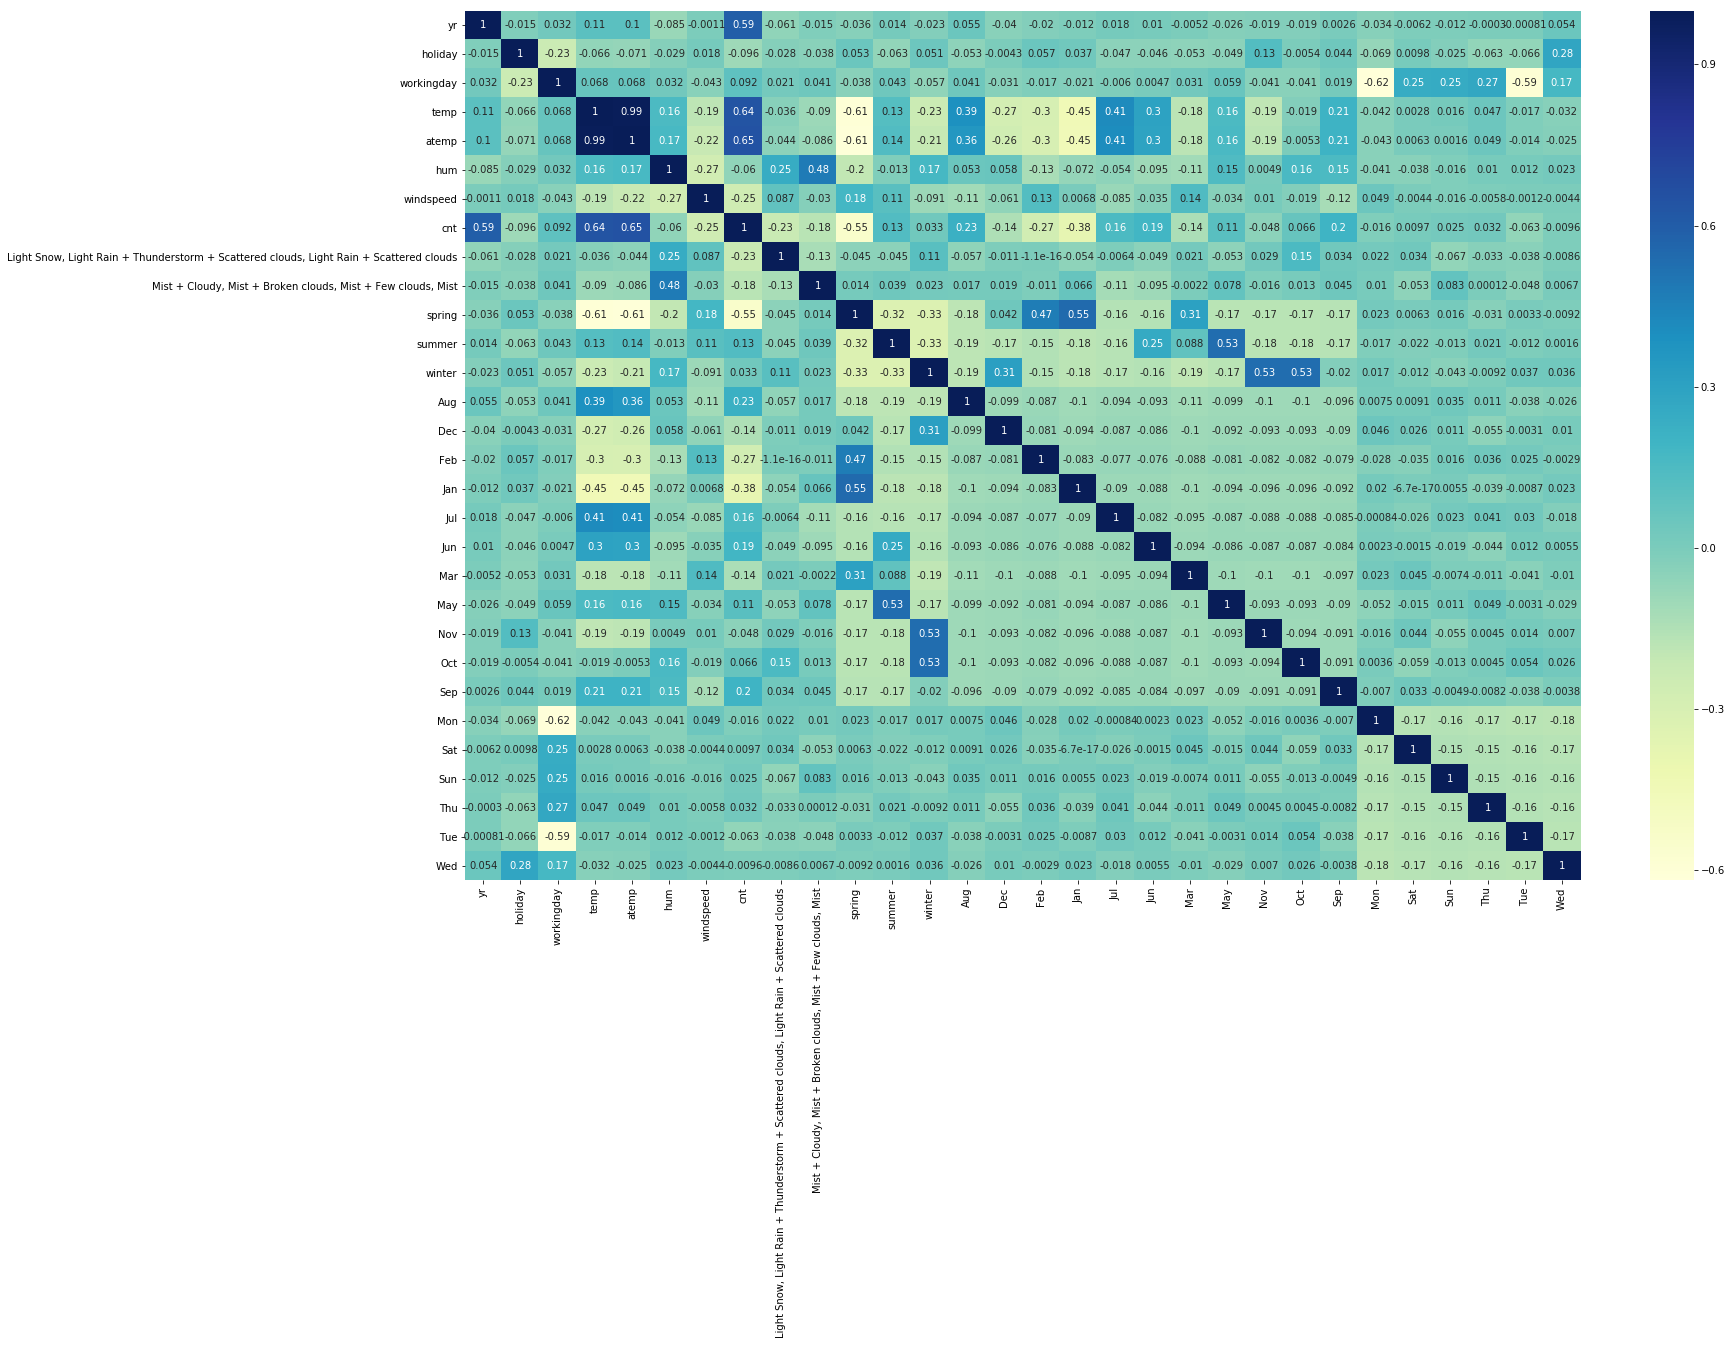

In [1275]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25, 16))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [1276]:
y_train = df_train.pop('cnt')
X_train = df_train

In [1277]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Step 5: Building a linear model

To build the model need to fit a regression line through the training data using `statsmodels`. Added a constant in that `statsmodels`, to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [1278]:
import statsmodels.api as sm

In [1279]:
X_train_lm= sm.add_constant(X_train)
LinearRegression_model_1=sm.OLS(y_train,X_train_lm).fit()

In [1280]:
# Checking the parameters obtained

LinearRegression_model_1.params

const                                                                                      0.242943
yr                                                                                         0.232208
holiday                                                                                    0.007249
workingday                                                                                 0.093522
temp                                                                                       0.401322
atemp                                                                                      0.050628
hum                                                                                       -0.151812
windspeed                                                                                 -0.184388
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds   -0.256697
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                              -0.061030


In [1281]:
# Print a summary of the linear regression model obtained
print(LinearRegression_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          8.42e-181
Time:                        23:17:58   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

### Checking VIF

In [1282]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1283]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,86.81
3,temp,67.12
4,atemp,56.09
23,Mon,19.72
27,Tue,18.35
9,spring,10.80
11,winter,9.52
10,summer,8.31
20,Nov,6.80
21,Oct,6.59


#### Dropping the insignificant variable 'atemp' as its p-value is .714 & VIF is also very high

In [1284]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('atemp', 1)

In [1285]:
# creating another model afetr dropping 'atemp' variable
X_train_lm_1 = sm.add_constant(X)
LinearRegression_model_2= sm.OLS(y_train, X_train_lm_1).fit()

In [1286]:
print(LinearRegression_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          8.74e-182
Time:                        23:18:01   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

### Calculate the VIFs again for the new model

In [1287]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,86.81
22,Mon,19.72
26,Tue,18.35
8,spring,10.79
10,winter,9.50
9,summer,8.29
3,temp,7.12
19,Nov,6.80
20,Oct,6.59
11,Aug,6.43


 #### Dropping the insignificant variable 'Aug' as its p-value is .669 & VIF is also very high

In [1288]:
# dropping variable
X1 = X.drop('Aug', 1)

In [1289]:
#building a new model
X_train_lm_2 = sm.add_constant(X1)
LinearRegression_model_3= sm.OLS(y_train, X_train_lm_2).fit()

In [1290]:
print(LinearRegression_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.0
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          9.11e-183
Time:                        23:18:03   Log-Likelihood:                 527.86
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

##### Checking VIF 

In [1291]:
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,71.83
21,Mon,16.07
25,Tue,15.21
10,winter,8.76
8,spring,8.58
3,temp,6.56
13,Jan,5.59
18,Nov,5.54
19,Oct,5.02
11,Dec,4.78


####  Dropping the insignificant variable 'Mar' as its p-value is .915

In [1292]:
#dropping variable
X2 = X1.drop('Mar', 1)

In [1293]:
# creating another new model
X_train_lm_3 = sm.add_constant(X2)
LinearRegression_model_4= sm.OLS(y_train, X_train_lm_3).fit()

In [1294]:
print(LinearRegression_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          8.54e-184
Time:                        23:18:05   Log-Likelihood:                 527.85
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     484   BIC:                            -893.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

#### Checking VIF 

In [1295]:
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,67.35
20,Mon,15.07
24,Tue,14.34
10,winter,7.93
3,temp,6.04
8,spring,5.90
17,Nov,4.38
18,Oct,4.08
9,summer,4.02
1,holiday,3.91


####  Dropping the insignificant variable 'Sun' as its p-value is .718

In [1296]:
X3 = X2.drop('Sun', 1)

In [1297]:
X_train_lm_4 = sm.add_constant(X3)

LinearRegression_model_5= sm.OLS(y_train, X_train_lm_4).fit()

In [1298]:
print(LinearRegression_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          8.31e-185
Time:                        23:18:08   Log-Likelihood:                 527.78
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     485   BIC:                            -899.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

#### Check VIF 

In [1299]:
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,64.34
20,Mon,15.05
23,Tue,14.32
10,winter,7.93
3,temp,6.03
8,spring,5.89
17,Nov,4.38
18,Oct,4.08
9,summer,4.02
1,holiday,3.77


#### Dropping the insignificant variable 'holiday' as its p-value is .681

In [1300]:
#dropping the variable 'holiday'
X4 = X3.drop('holiday', 1)

In [1301]:
#creating a new model
X_train_lm_5 = sm.add_constant(X4)
LinearRegression_model_6= sm.OLS(y_train, X_train_lm_5).fit()

In [1302]:
print(LinearRegression_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          8.31e-185
Time:                        23:18:11   Log-Likelihood:                 527.78
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     485   BIC:                            -899.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

#### Checking VIF

In [1303]:
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,37.92
2,temp,27.43
1,workingday,19.99
9,winter,10.18
7,spring,6.20
19,Mon,5.64
22,Tue,5.39
4,windspeed,5.24
16,Nov,4.46
17,Oct,4.42


#### Dropping the insignificant variable 'Tue' as its p-value is .232 & VIF is also very high

In [1304]:
X5 = X4.drop('Tue', 1)

In [1305]:
X_train_lm_6 = sm.add_constant(X5)
LinearRegression_model_7= sm.OLS(y_train, X_train_lm_6).fit()

In [1306]:
print(LinearRegression_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.4
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.51e-185
Time:                        23:18:12   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

#### Checking VIF

In [1307]:
vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,34.39
2,temp,24.02
9,winter,9.80
7,spring,5.67
1,workingday,5.64
4,windspeed,5.02
16,Nov,4.46
17,Oct,4.42
8,summer,3.82
10,Dec,3.22


#### Dropping the insignificant variable 'atemp' as its p-value is .976 

In [1308]:
X6 = X5.drop('Oct', 1)

In [1309]:
X_train_lm_7 = sm.add_constant(X6)

LinearRegression_model_8= sm.OLS(y_train, X_train_lm_7).fit()

In [1310]:
print(LinearRegression_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.32e-186
Time:                        23:18:14   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

#### Checking VIF

In [1311]:
vif = pd.DataFrame()
vif['Features'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,33.64
2,temp,23.97
1,workingday,5.62
7,spring,5.60
4,windspeed,4.98
9,winter,4.12
8,summer,3.74
12,Jan,2.44
6,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.34
0,yr,2.13


#### Dropping the insignificant variable 'Jun' as its p-value is .639 

In [1312]:
X7 = X6.drop('Jun', 1)

In [1313]:
X_train_lm_8 = sm.add_constant(X7)

LinearRegression_model_9= sm.OLS(y_train, X_train_lm_8).fit()

In [1314]:
print(LinearRegression_model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.5
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.25e-187
Time:                        23:18:16   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     488   BIC:                            -916.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

#### Checking VIF

In [1315]:
vif = pd.DataFrame()
vif['Features'] = X7.columns
vif['VIF'] = [variance_inflation_factor(X7.values, i) for i in range(X7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.90
2,temp,19.62
1,workingday,5.61
7,spring,5.59
4,windspeed,4.88
9,winter,4.12
8,summer,3.42
12,Jan,2.39
6,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.34
0,yr,2.11


#### Dropping the insignificant variable 'Sat' as its p-value is .488

In [1316]:
X8 = X7.drop('Sat', 1)

In [1317]:
X_train_lm_9 = sm.add_constant(X8)

LinearRegression_model_10= sm.OLS(y_train, X_train_lm_9).fit()

In [1318]:
print(LinearRegression_model_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     141.4
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.32e-188
Time:                        23:18:18   Log-Likelihood:                 526.66
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     489   BIC:                            -922.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

#### Checking VIF

In [1319]:
vif = pd.DataFrame()
vif['Features'] = X8.columns
vif['VIF'] = [variance_inflation_factor(X8.values, i) for i in range(X8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.90
2,temp,19.60
7,spring,5.59
1,workingday,5.13
4,windspeed,4.88
9,winter,4.12
8,summer,3.42
12,Jan,2.39
6,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.33
0,yr,2.11


#### Dropping the insignificant variable 'Thu' as its p-value is .224

In [1320]:
X9 = X8.drop('Thu', 1)

In [1321]:
X_train_lm_10 = sm.add_constant(X9)

LinearRegression_model_11= sm.OLS(y_train, X_train_lm_10).fit()

In [1322]:
print(LinearRegression_model_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.6
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          2.22e-189
Time:                        23:18:20   Log-Likelihood:                 525.89
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

#### Checking VIF 11th time

In [1323]:
vif = pd.DataFrame()
vif['Features'] = X9.columns
vif['VIF'] = [variance_inflation_factor(X9.values, i) for i in range(X9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.87
2,temp,19.59
7,spring,5.58
4,windspeed,4.87
1,workingday,4.81
9,winter,4.12
8,summer,3.42
12,Jan,2.39
6,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.33
0,yr,2.11


#### Dropping the insignificant variable 'May' as its p-value is .157

In [1324]:
X10 = X9.drop('May', 1)

In [1325]:
X_train_lm_11 = sm.add_constant(X10)

LinearRegression_model_12= sm.OLS(y_train, X_train_lm_11).fit()

In [1326]:
print(LinearRegression_model_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.4
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          4.74e-190
Time:                        23:18:21   Log-Likelihood:                 524.85
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

#### Dropping the insignificant variable 'Feb' as its p-value is .095

In [1327]:
X11 = X10.drop('Feb', 1)

In [1328]:
X_train_lm_12 = sm.add_constant(X11)

LinearRegression_model_13= sm.OLS(y_train, X_train_lm_12).fit()

In [1329]:
print(LinearRegression_model_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     164.9
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.45e-190
Time:                        23:18:22   Log-Likelihood:                 523.40
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     492   BIC:                            -934.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

#### Dropping the insignificant variable 'Wed' as its p-value is .09

In [1330]:
X12 = X11.drop('Wed', 1)

In [1331]:
X_train_lm_13 = sm.add_constant(X12)

LinearRegression_model_14= sm.OLS(y_train, X_train_lm_13).fit()

In [1332]:
print(LinearRegression_model_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          4.53e-191
Time:                        23:18:23   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

#### Checking VIF

In [1333]:
vif = pd.DataFrame()
vif['Features'] = X12.columns
vif['VIF'] = [variance_inflation_factor(X12.values, i) for i in range(X12.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.14
2,temp,18.94
4,windspeed,4.77
1,workingday,4.76
7,spring,4.50
9,winter,4.11
8,summer,2.86
6,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.32
0,yr,2.09
15,Mon,1.86


#### Dropping variable as per VIF column as the value of 'hum' is 31.14

In [1334]:
X13 = X12.drop('hum', 1)

In [1335]:
X_train_lm_14 = sm.add_constant(X13)

LinearRegression_model_15= sm.OLS(y_train, X_train_lm_14).fit()

In [1336]:
print(LinearRegression_model_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          5.71e-189
Time:                        23:18:24   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

#### checking VIF

In [1337]:
vif = pd.DataFrame()
vif['Features'] = X13.columns
vif['VIF'] = [variance_inflation_factor(X13.values, i) for i in range(X13.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.92
1,workingday,4.73
3,windspeed,4.71
6,spring,3.09
8,winter,3.02
7,summer,2.32
0,yr,2.08
14,Mon,1.86
12,Nov,1.78
10,Jan,1.67


#### Dropping the variable 'temp' as the VIF is 6.92

In [1338]:
X14 = X13.drop('temp', 1)

In [1339]:
X_train_lm_15 = sm.add_constant(X14)

LinearRegression_model_16= sm.OLS(y_train, X_train_lm_15).fit()

In [1340]:
print(LinearRegression_model_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     140.2
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          5.05e-162
Time:                        23:18:25   Log-Likelihood:                 447.16
No. Observations:                 510   AIC:                            -864.3
Df Residuals:                     495   BIC:                            -800.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

#### checking VIF 

In [1341]:
vif = pd.DataFrame()
vif['Features'] = X14.columns
vif['VIF'] = [variance_inflation_factor(X14.values, i) for i in range(X14.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.25
1,workingday,3.55
5,spring,3.03
7,winter,3.00
6,summer,2.25
0,yr,1.91
11,Nov,1.76
9,Jan,1.64
13,Mon,1.63
4,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.56


#### Dropping the insignificant variable 'Jul' as its p-value is .457

In [1342]:
X15 = X14.drop('Jul', 1)

In [1343]:
X_train_lm_16 = sm.add_constant(X15)

LinearRegression_model_17= sm.OLS(y_train, X_train_lm_16).fit()

In [1344]:
print(LinearRegression_model_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     151.1
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          5.30e-163
Time:                        23:18:27   Log-Likelihood:                 446.87
No. Observations:                 510   AIC:                            -865.7
Df Residuals:                     496   BIC:                            -806.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

#### Dropping the insignificant variable 'winter' as its p-value is .446

In [1345]:
X16 = X15.drop('winter', 1)

## Creating the Final Model

In [1346]:
X_train_lm_17 = sm.add_constant(X16)

LinearRegression_model_18= sm.OLS(y_train, X_train_lm_17).fit()

In [1347]:
print(LinearRegression_model_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     163.8
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          5.41e-164
Time:                        23:18:28   Log-Likelihood:                 446.58
No. Observations:                 510   AIC:                            -867.2
Df Residuals:                     497   BIC:                            -812.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

#### Checking VIF

In [1348]:
vif = pd.DataFrame()
vif['Features'] = X16.columns
vif['VIF'] = [variance_inflation_factor(X16.values, i) for i in range(X16.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.92
1,workingday,3.20
5,spring,2.38
0,yr,1.87
6,summer,1.77
8,Jan,1.63
4,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.54
11,Mon,1.54
9,Nov,1.22
10,Sep,1.20


Now as we can observe, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression).

In [1349]:
y_train_cnt = LinearRegression_model_18.predict(X_train_lm_17)

Text(0.5, 0, 'Errors')

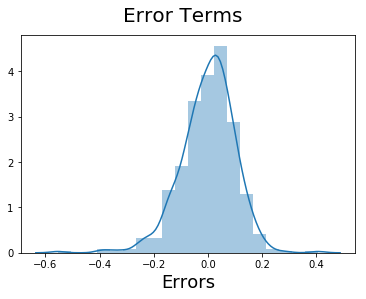

In [1350]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 

plt.xlabel('Errors', fontsize = 18)                         # X-label

It can be inferred from the above plot that, 
The mean of the residuals is it zero (or very close),so then this assumption is held true for this model.


## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

 #### Applying the scaling on the test sets

In [1351]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [1352]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,0.516216,0.027397,0.319635,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854
std,0.500722,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,0.238702,0.163612,0.467403,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing in X_test & y_test

In [1353]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1354]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [1355]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["atemp", "Aug", "Mar",'Sun','holiday','Tue','Oct','Jun','Sat','Thu','May','Feb','Wed',
                            'hum','temp','Jul','winter'], axis = 1)

In [1356]:
# Making predictions using the Final Model
y_pred_m4 = LinearRegression_model_18.predict(X_test_m4)

### Model evaluation

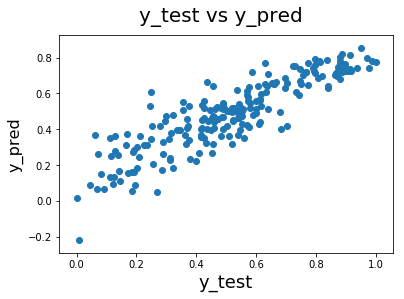

In [1357]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16);    

It is found that the Actual dat(y_test)a and the predicted data(y_pred) are Linear to each other

### Model Evaluation

In [1358]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.7642301408785126

In [1359]:
#Final Model Parameters are,
LinearRegression_model_18.params

const                                                                                      0.535951
yr                                                                                         0.245744
workingday                                                                                 0.057024
windspeed                                                                                 -0.192617
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds   -0.320724
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                              -0.090099
spring                                                                                    -0.238120
summer                                                                                    -0.040292
Dec                                                                                       -0.118632
Jan                                                                                       -0.123145


We can see that the equation of our best fitted line is:

$ cnt =0.536 + 0.245  \times  yr + 0.057  \times  workingday - 0.192 \times windspeed - 0.32 \times Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds - 0.09 \times Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist - 0.238 \times spring - 0.04 \times summer - 0.118 \times Dec - 0.123 \times Jan - 0.112 \times Nov + 0.055 \times Sep + 0.066 \times Mon $
